# World Happiness Report Analysis

Данный датасет содержит обзор состояния глобального счастья в мире. 
В оценках и рейтингах счастья используются данные Всемирного опроса Гэллапа. Оценки основаны на ответах на основной вопрос оценки жизни, заданный в опросе. Этот вопрос, известный как лестница Кантрила, просит респондентов подумать о лестнице с наилучшей возможной для них жизнью, эквивалентной 10, и наихудшей возможной жизнью, эквивалентной 0, и оценить свою текущую жизнь по этой шкале. 
Оценки взяты из национальных репрезентативных выборок за 2013-2016 годы и используют веса Гэллапа, чтобы сделать оценки репрезентативными. Столбцы, следующие за баллом счастья, оценивают степень, в которой каждый из шести факторов – экономическое производство, социальная поддержка, ожидаемая продолжительность жизни, свобода, отсутствие коррупции и щедрость – способствуют тому, чтобы оценки жизни в каждой стране были выше, чем в Антиутопии, гипотетической стране, которая имеет значения, равные самым низким национальным средним показателям в мире для каждого из шести факторов. Они не влияют на общий балл по каждой стране, но объясняют, почему некоторые страны занимают более высокое место, чем другие.

In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df2015 = pd.read_csv('./2015.csv', sep = ",")
df2016 = pd.read_csv('./2016.csv', sep = ",")
df2017 = pd.read_csv('./2017.csv', sep = ",")
df2018 = pd.read_csv('./2018.csv', sep = ",")
df2019 = pd.read_csv('./2019.csv', sep = ",")

Рассмотрим основные параметры распределений числовых признаков для каждого года (их средние, максимумы, минимумы, медианы, квантили):

In [3]:
df2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
df2016.describe()


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [5]:
df2017.describe()


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [6]:
df2018.describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [7]:
df2019.describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Построим гистограмму распределения Happiness Score и его распределение по регионам в 2015 году. Можно отметить, что Австралия и Новая Зеландия являются наиболее счастливыми регионами.

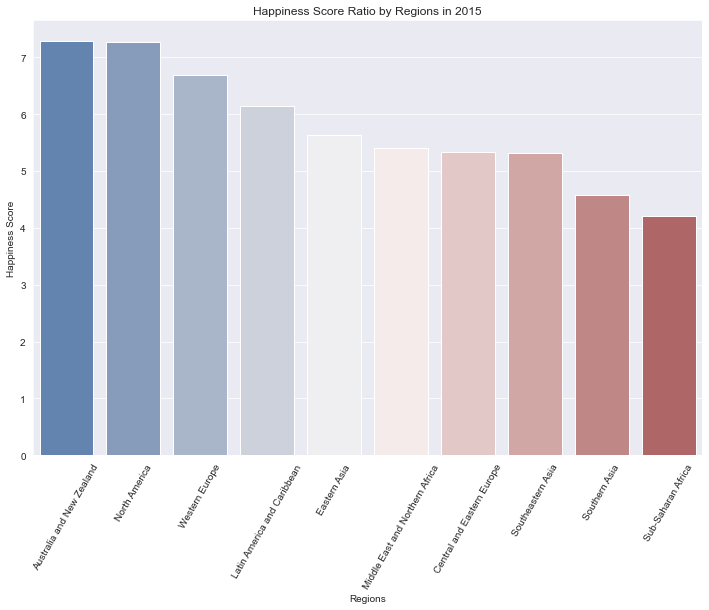

In [37]:
region_list = list(df2015.Region.unique())
region_happiness_score_ratio = []
for i in region_list:
    x = df2015[df2015.Region == i]
    region_happiness_score_rate = sum(x["Happiness Score"])/len(x)
    region_happiness_score_ratio.append(region_happiness_score_rate)
data_bar = pd.DataFrame({'region_list':region_list, 'region_happiness_score_ratio':region_happiness_score_ratio})
new_index = (data_bar['region_happiness_score_ratio'].sort_values(ascending = False)).index.values
sorted_data = data_bar.reindex(new_index)
plt.figure(figsize=(12,8))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_happiness_score_ratio'], palette="vlag")
plt.xticks(rotation= 60)
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Ratio by Regions in 2015')
sns.set_style("darkgrid")

Поскольку датасет не содержит категориальных переменных, введем три категории: назовем страну счастливой, если ее Happiness Score выше верхнего квартиля по данным этого года, несчастливой - если ее Happiness Score ниже нижнего квартиля по данным этого года, и средней - в оставшемся случае.

In [9]:
filter1 = df2015['Happiness Score']>=np.percentile(df2015["Happiness Score"], 75)
happy_countries = df2015[filter1]
print('Happy countries in 2015:')
happy_countries['Country'].head()

Happy countries in 2015:


0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
Name: Country, dtype: object

In [10]:
filter1 = df2016['Happiness Score']>=np.percentile(df2016["Happiness Score"], 75)
happy_countries = df2016[filter1]
print('Happy countries in 2016:')
happy_countries['Country'].head()

Happy countries in 2016:


0        Denmark
1    Switzerland
2        Iceland
3         Norway
4        Finland
Name: Country, dtype: object

In [11]:
filter1 = df2017['Happiness.Score']>=np.percentile(df2017["Happiness.Score"], 75)
happy_countries = df2017[filter1]
print('Happy countries in 2017:')
happy_countries['Country'].head()

Happy countries in 2017:


0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
Name: Country, dtype: object

In [12]:
filter1 = df2018['Score']>=np.percentile(df2018["Score"], 75)
happy_countries = df2018[filter1]
print('Happy countries in 2018:')
happy_countries['Country or region'].head()

Happy countries in 2018:


0        Finland
1         Norway
2        Denmark
3        Iceland
4    Switzerland
Name: Country or region, dtype: object

In [13]:
filter1 = df2019['Score']>=np.percentile(df2019["Score"], 75)
happy_countries = df2019[filter1]
print('Happy countries in 2019:')
happy_countries['Country or region'].head()

Happy countries in 2019:


0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
Name: Country or region, dtype: object

Для 2015 и 2016 года можно посмотреть распределение счастливых стран по регионам, а также визуализировать это для наглядности.

In [14]:
filter1 = df2015['Happiness Score']>=np.percentile(df2015["Happiness Score"], 75)
happy_countries = df2015[filter1]
happy_countries.Region.unique()
print('Happy countries by regions in 2015:')
happy_countries.Region.value_counts()

Happy countries by regions in 2015:


Western Europe                     16
Latin America and Caribbean        10
Middle East and Northern Africa     6
Southeastern Asia                   2
Australia and New Zealand           2
North America                       2
Central and Eastern Europe          1
Eastern Asia                        1
Name: Region, dtype: int64

Text(0.5, 1.0, 'Disstribution of the Happiest Countries by Region')

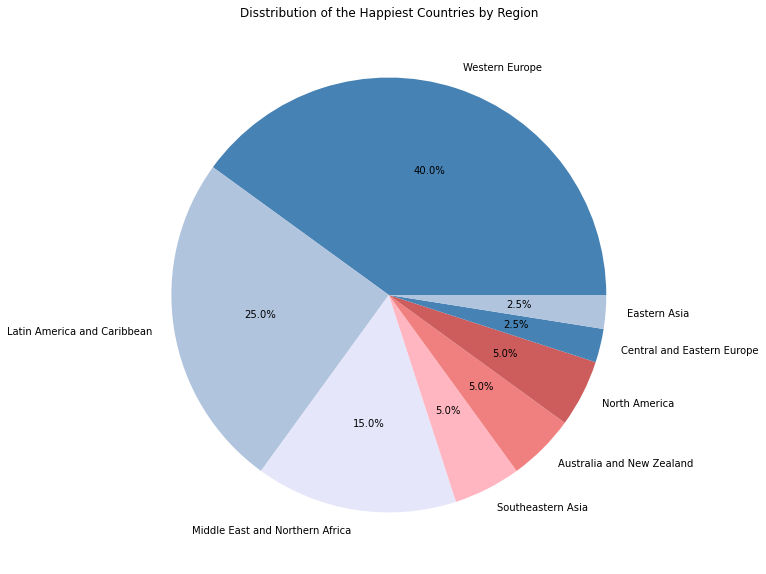

In [15]:
labels = happy_countries.Region.value_counts().index
colors = ['steelblue','lightsteelblue','lavender', 'lightpink', 'lightcoral', 'indianred']
explode = [0,0,0,0,0,0,0,0]
sizes = happy_countries.Region.value_counts().values
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Disstribution of the Happiest Countries by Region')

In [16]:
filter1 = df2016['Happiness Score']>=np.percentile(df2016["Happiness Score"], 75)
happy_countries = df2016[filter1]
happy_countries.Region.unique()
print('Happy countries by regions in 2016:')
happy_countries.Region.value_counts()

Happy countries by regions in 2016:


Western Europe                     16
Latin America and Caribbean        11
Middle East and Northern Africa     5
Southeastern Asia                   2
Australia and New Zealand           2
North America                       2
Central and Eastern Europe          1
Eastern Asia                        1
Name: Region, dtype: int64

Text(0.5, 1.0, 'Disstribution of the Happiest Countries by Region')

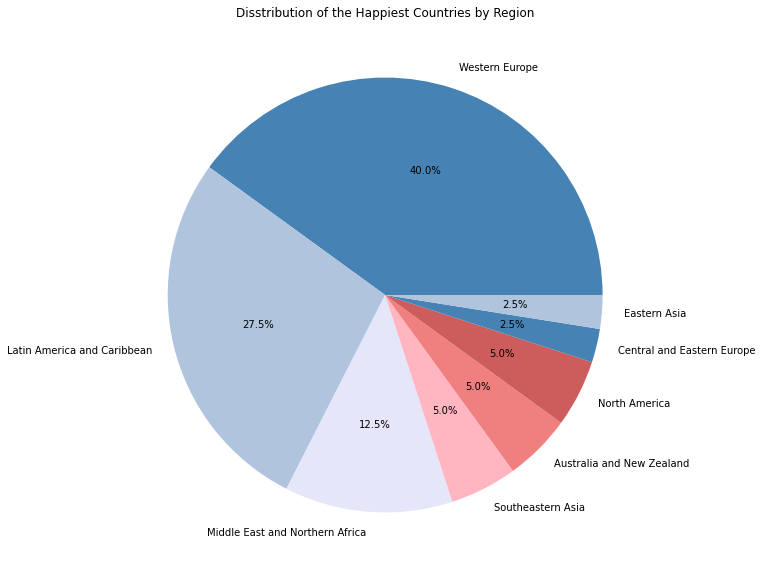

In [17]:
labels = happy_countries.Region.value_counts().index
colors = ['steelblue','lightsteelblue','lavender', 'lightpink', 'lightcoral', 'indianred']
explode = [0,0,0,0,0,0,0,0]
sizes = happy_countries.Region.value_counts().values
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Disstribution of the Happiest Countries by Region')

Построим матрицу корреляций. Можно отметить, что достаточно высокие значения корреляции с Happiness Score имеют уровень экономического и семейного благополучия, а также здоровье (продолжительность жизни) населения. 

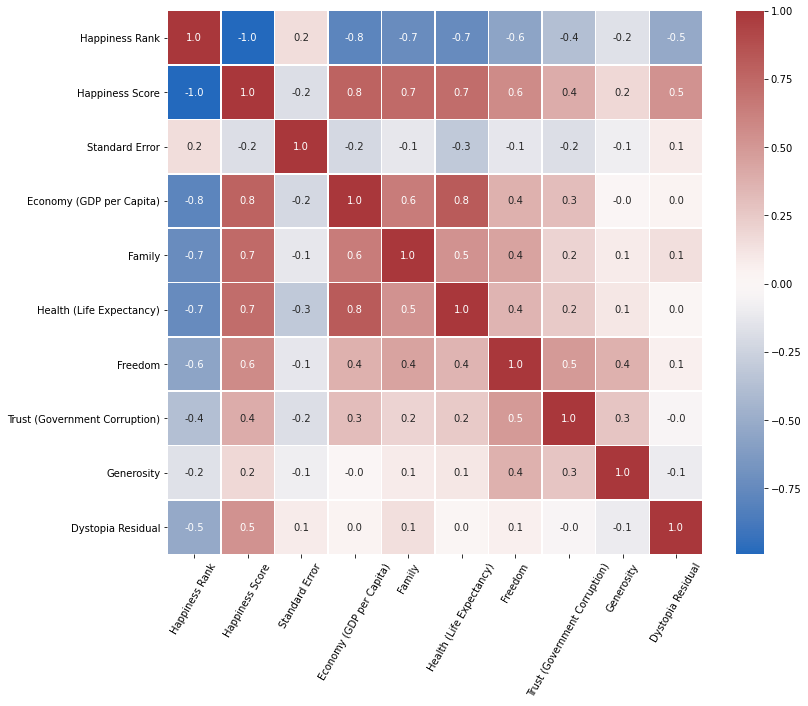

In [18]:
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df2015.corr(), annot=True, linewidths=.5, fmt= '.1f', cmap="vlag", ax=ax)
plt.xticks(rotation= 60)
plt.show()

In [19]:
df2015.iloc[df2015['Generosity'].argmax()]

Country                                    Myanmar
Region                           Southeastern Asia
Happiness Rank                                 129
Happiness Score                              4.307
Standard Error                             0.04351
Economy (GDP per Capita)                   0.27108
Family                                     0.70905
Health (Life Expectancy)                   0.48246
Freedom                                    0.44017
Trust (Government Corruption)              0.19034
Generosity                                 0.79588
Dystopia Residual                          1.41805
Name: 128, dtype: object

In [20]:
df2015.iloc[df2015['Generosity'].argmin()]

Country                                  Greece
Region                           Western Europe
Happiness Rank                              102
Happiness Score                           4.857
Standard Error                          0.05062
Economy (GDP per Capita)                1.15406
Family                                  0.92933
Health (Life Expectancy)                0.88213
Freedom                                 0.07699
Trust (Government Corruption)           0.01397
Generosity                                    0
Dystopia Residual                       1.80101
Name: 101, dtype: object

In [21]:
df2015.iloc[df2015['Trust (Government Corruption)'].argmax()]

Country                                      Rwanda
Region                           Sub-Saharan Africa
Happiness Rank                                  154
Happiness Score                               3.465
Standard Error                              0.03464
Economy (GDP per Capita)                    0.22208
Family                                       0.7737
Health (Life Expectancy)                    0.42864
Freedom                                     0.59201
Trust (Government Corruption)               0.55191
Generosity                                  0.22628
Dystopia Residual                           0.67042
Name: 153, dtype: object

In [22]:
df2015.iloc[df2015['Trust (Government Corruption)'].argmin()]

Country                                  Indonesia
Region                           Southeastern Asia
Happiness Rank                                  74
Happiness Score                              5.399
Standard Error                             0.02596
Economy (GDP per Capita)                   0.82827
Family                                     1.08708
Health (Life Expectancy)                   0.63793
Freedom                                    0.46611
Trust (Government Corruption)                    0
Generosity                                 0.51535
Dystopia Residual                          1.86399
Name: 73, dtype: object

Тот факт, что сильная экономика и высокая ожидаемая продолжительность жизни положительно коррелируют со счастьем, не очень удивителен. С другой стороны, можно подумать, что люди, которые доверяют своему правительству, счастливее, потому что они верят, что то, что делает правительство, приносит пользу стране. С нашими максимальными и минимальными значениями мы видим, что Индонезия, которая меньше всего доверяет своему правительству, занимает 74-е место по шкале счастья, а Руанда, которая имеет максимальное доверие, занимает 154-е место. Кроме того, можно подумать, что щедрость положительно коррелирует со счастьем, но мы видим, что самая щедрая страна, Мьянма, занимает 129-е место, когда речь заходит о счастье, а наименее щедрая Греция занимает 102-е место. Очевидно, что максимум и минимум не являются репрезентативными данными, но это все еще довольно интересное наблюдение.

Поскольку уровень экономического благополучия имеет наибольшую корреляцию с Happiness Score, можно предположить, что имеется некоторая связь между этими параметрами. Исследуем это предположение. Для начала посмотрим, как распределено экономическое благополучие по регионам.

Text(0.5, 1.0, 'Economy Ratio by Regions in 2015')

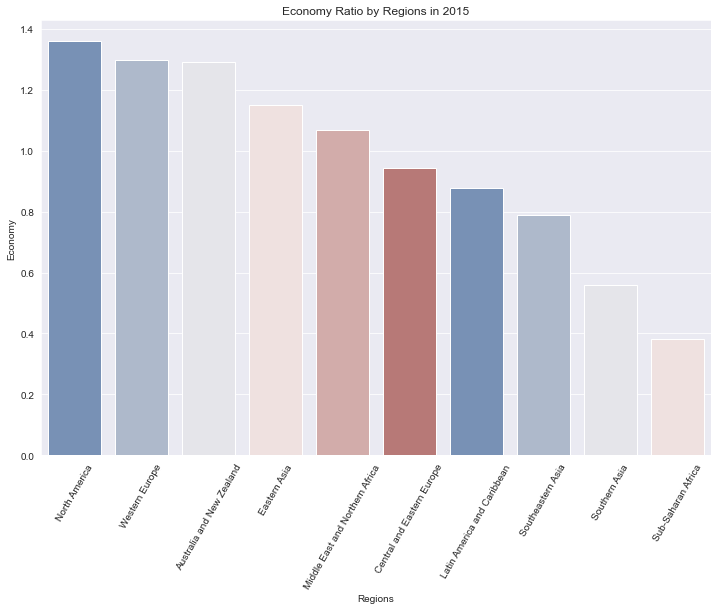

In [38]:
region_economy_ratio = []
for i in region_list:
    y = df2015[df2015.Region == i]
    region_economy_rate = sum(y['Economy (GDP per Capita)'])/len(y)
    region_economy_ratio.append(region_economy_rate)
    
data_bar2 = pd.DataFrame({'region_list':region_list,'region_economy_ratio':region_economy_ratio})
new_index2=(data_bar2['region_economy_ratio'].sort_values(ascending = False)).index.values
sorted_data2 = data_bar2.reindex(new_index2)

plt.figure(figsize=(12,8))
sns.barplot(x=sorted_data2['region_list'], y=sorted_data2['region_economy_ratio'], palette = sns.color_palette("vlag"))
plt.xticks(rotation= 60)
plt.xlabel('Regions')
plt.ylabel('Economy')
plt.title('Economy Ratio by Regions in 2015')

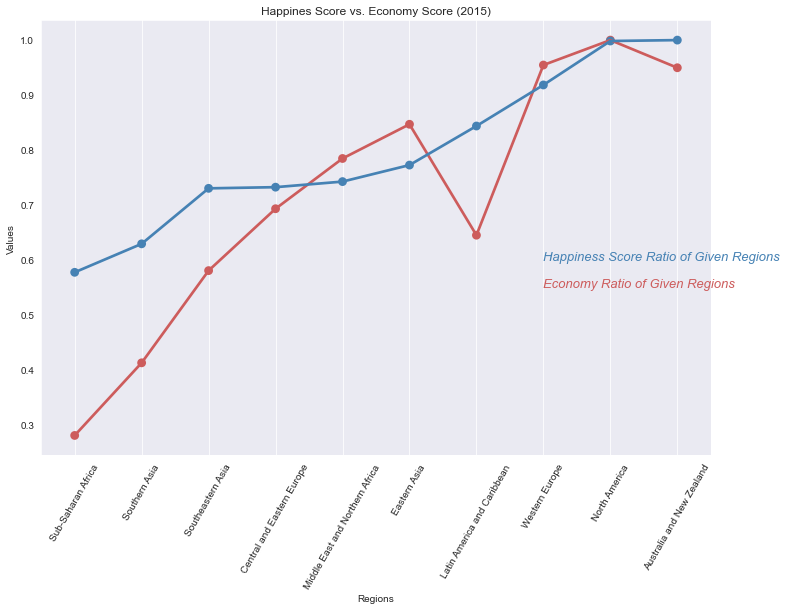

In [39]:
sorted_data.region_happiness_score_ratio = sorted_data.region_happiness_score_ratio/max(sorted_data.region_happiness_score_ratio)
sorted_data2.region_economy_ratio = sorted_data2.region_economy_ratio/max(sorted_data2.region_economy_ratio)
data = pd.concat([sorted_data,sorted_data2.region_economy_ratio],axis = 1)
data.sort_values("region_happiness_score_ratio",inplace = True)

f,ax1 = plt.subplots(figsize = (12,8))
sns.pointplot(x = "region_list",y = "region_economy_ratio", data = data, color = 'indianred', alpha = 0.7)
sns.pointplot(x = "region_list",y = "region_happiness_score_ratio", data = data, color = 'steelblue', alpha = 0.7)
plt.text(7,0.6, "Happiness Score Ratio of Given Regions",color = 'steelblue', fontsize = 13, style = 'italic' )
plt.text(7, 0.55, "Economy Ratio of Given Regions", color = 'indianred', fontsize = 13, style = 'italic')
plt.xlabel('Regions')
plt.ylabel('Values')
plt.xticks(rotation = 60)
plt.title('Happines Score vs. Economy Score (2015)')
plt.grid()

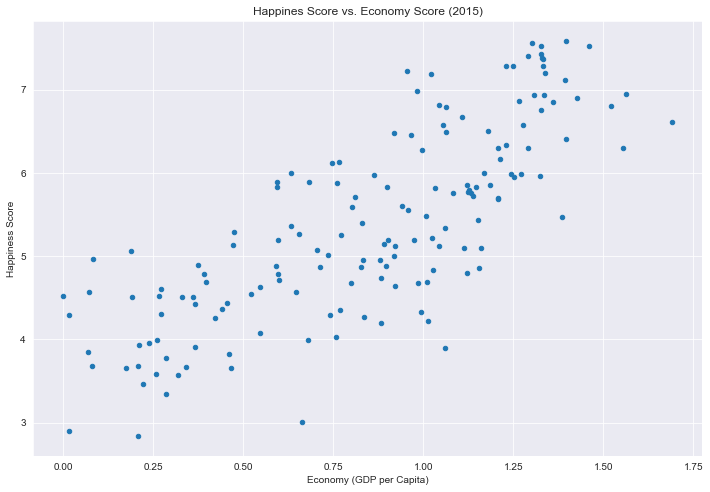

In [36]:
df2015.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score", figsize = (12,8))
plt.title('Happines Score vs. Economy Score (2015)')
sns.set_style("darkgrid")

На графике корреляции мы увидели, что экономическое благополучие страны и уровень счастья ее наеления очень коррелируют. Чтобы развить эту гипотезу, было решено использовать линейную регрессию, чтобы увидеть, насколько хорошо можно предсказать показатель счастья на основе экономического благополучия страны.

In [30]:
import sklearn

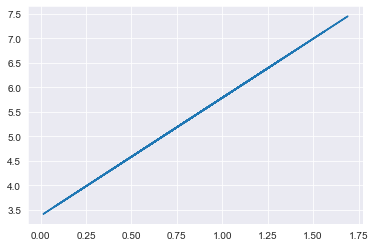

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = df2015['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df2015['Happiness Score'].values.reshape(-1,1)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=0)

lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
plt.plot(x_test,y_pred)

In [32]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_
print('equation of the line is: ',b1,'x +',b0)

equation of the line is:  [[2.4060534]] x + [3.38107425]


In [33]:
xtest = pd.DataFrame(x_test)
ypred = pd.DataFrame(y_pred)
ytest = pd.DataFrame(y_test)
prediction = pd.concat([xtest,ypred, ytest],axis=1)
prediction.columns = ['xtest','ypred', 'ytest']
prediction.sort_values(by='xtest', ascending=False, axis = 0, inplace = True)
prediction.head(10)

,xtest,ypred,ytest
40,1.69042,7.448315,6.611
32,1.56391,7.143925,6.946
27,1.42727,6.815162,6.901
47,1.38604,6.715961,5.474
0,1.33171,6.585240,7.364
49,1.32548,6.570250,7.527
44,1.30782,6.527759,6.937
25,1.29098,6.487241,6.298
20,1.27074,6.438543,5.987
23,1.25018,6.389074,7.286


In [34]:
from sklearn.metrics import mean_squared_error
ypred = prediction["ypred"].to_numpy()
ytest = prediction["ytest"].to_numpy()
rms = np.sqrt(mean_squared_error(ytest, ypred))
print(rms)

0.7991338043307233


Поскольку значение среднеквадратичного отклонения мало, наша модель достаточна точна.

Далее был создан один датафрейм по всем годам, содержащий только три столбца - страна, год исследования и Happiness Rank. Если страна не участвовала в рассмотрении хотя бы в одном году, она не попадала в наш датафрейм.

In [35]:
df2015hap = df2015[["Happiness Rank", "Country"]]
df2015hap['Year'] = 2015
df2016hap = df2016[["Happiness Rank", "Country"]]
df2016hap['Year'] = 2016
df2017hap = df2017[["Happiness.Rank", "Country"]]
df2017hap = df2017hap.rename(columns={"Happiness.Rank": "Happiness Rank"})
df2017hap['Year'] = 2017
df2018hap = df2018[["Overall rank", "Country or region"]]
df2018hap = df2018hap.rename(columns={"Overall rank": "Happiness Rank", "Country or region": "Country"})
df2018hap['Year'] = 2018
df2019hap = df2019[["Overall rank", "Country or region"]]
df2019hap = df2019hap.rename(columns={"Overall rank": "Happiness Rank", "Country or region":"Country"})
df2019hap['Year'] = 2019

<ipython-input-35-5cefa06e288a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015hap['Year'] = 2015
<ipython-input-35-5cefa06e288a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016hap['Year'] = 2016


In [26]:
dftotalhap = pd.concat([df2015hap, df2016hap, df2017hap, df2018hap, df2019hap], ignore_index=True)
dftotalnewhap = dftotalhap.groupby('Country').filter(lambda x : len(x)>4)
dftotalnewhap.head()

,Happiness Rank,Country,Year
0,1,Switzerland,2015
1,2,Iceland,2015
2,3,Denmark,2015
3,4,Norway,2015
4,5,Canada,2015


In [27]:
dfavghap = dftotalnewhap.groupby(['Country']).mean().sort_values(by = ['Happiness Rank'])[["Happiness Rank"]]
dfavghap

,Happiness Rank
Country,
Denmark,2.2
Norway,2.8
Iceland,3.2
Switzerland,3.6
Finland,3.6
...,...
Afghanistan,149.4
Tanzania,150.8
Rwanda,152.0


# Результаты и выводы:

1. Для начала были проанализированны основные параметры распределений числовых признаков для каждого года (их средние, максимумы, минимумы, медианы, квантили) 
2. Затем страны были сгруппированы по регионам, и была построена гистограмма распределения Happiness Score по регионам для данных 2015 года
3. Также искуственно был введен категориальный признак счастливости страны на основании ее Happiness Score (выше верхнего квартиля - счастливая, ниже нижнего - несчастливая) и на основании данного признака были получены списки счастливых стран каждого года. Для данных 2015 и 2016 года эти списки также были сгруппированы по регионам, для чего были представлены соответствующие диаграммы.
4. Далее была построена матрица корреляций для данных 2015 года, а также найдены "выпадающие значения". Результаты оказались контринтуитивными. 
5. Далее была выдвинута гипотеза о том, что есть корреляция между экономическим благополучием страны и счастьем ее населения. 
6. Было построено совместное распределение данных величин, а также предложена модель для предсказания Happiness Score на основании уровня экономического благополучия страны.
7. Наконец, все датафреймы были объединены в один, с помощью которого был создан список средних мест за все года по уровню счастья, занимаемых каждой страной. Оказалось, что Дания занимает лидирующую позицию.